In [6]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, RobustScaler
from scipy.stats import pearsonr
import copy
from scipy import optimize as opt
import altmin_pca

In [7]:
mot_bursts=np.load('mot_bursts.npy')
vis_bursts=np.load('vis_bursts.npy')
all_bursts=np.vstack([mot_bursts, vis_bursts])
ncomps=20
burst_std=RobustScaler().fit_transform(all_bursts)
pca = PCA(n_components=ncomps)
pcs = pca.fit_transform(burst_std)

0.6716473056361238


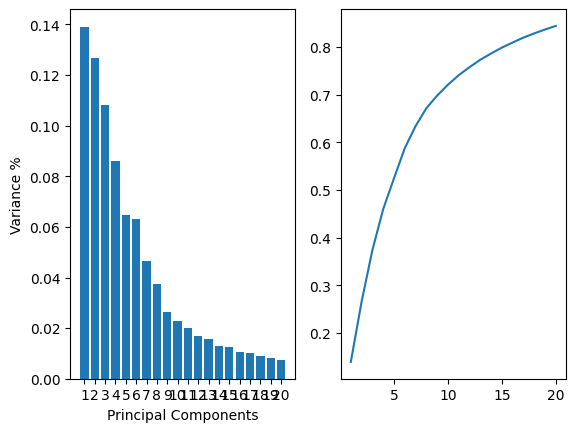

In [8]:
# Plotting the variances for each PC
PC = range(1, pca.n_components_+1)
plt.figure(facecolor='w')
plt.subplot(1,2,1)
plt.bar(PC, pca.explained_variance_ratio_)
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.xticks(PC)

plt.subplot(1,2,2)
plt.plot(range(1,len(PC)+1),pca.explained_variance_ratio_.cumsum())

pcs_to_analyze=20
print(pca.explained_variance_ratio_.cumsum()[7])

In [9]:
[W,C]=altmin_pca.pca(burst_std, ncomps)

PC1: iterations=60, error=251.54470514768786
PC2: iterations=57, error=232.32701690481747
PC3: iterations=26, error=214.56711333631114
PC4: iterations=14, error=199.3073863264962
PC5: iterations=21, error=186.9939630282306
PC6: iterations=12, error=174.1376110191295
PC7: iterations=15, error=164.0155556325455
PC8: iterations=16, error=155.39108142870467
PC9: iterations=21, error=149.0090260709287
PC10: iterations=13, error=143.26242097138794
PC11: iterations=26, error=138.03811327406794
PC12: iterations=20, error=133.46338329391506
PC13: iterations=17, error=129.11102553500902
PC14: iterations=24, error=125.3442895625436
PC15: iterations=25, error=121.64083166184876
PC16: iterations=34, error=118.37364549876779
PC17: iterations=17, error=115.111639634236
PC18: iterations=18, error=112.25669958832526
PC19: iterations=25, error=109.55287774285705
PC20: iterations=20, error=106.99545229872699


Text(0, 0.5, 'optimized PCA')

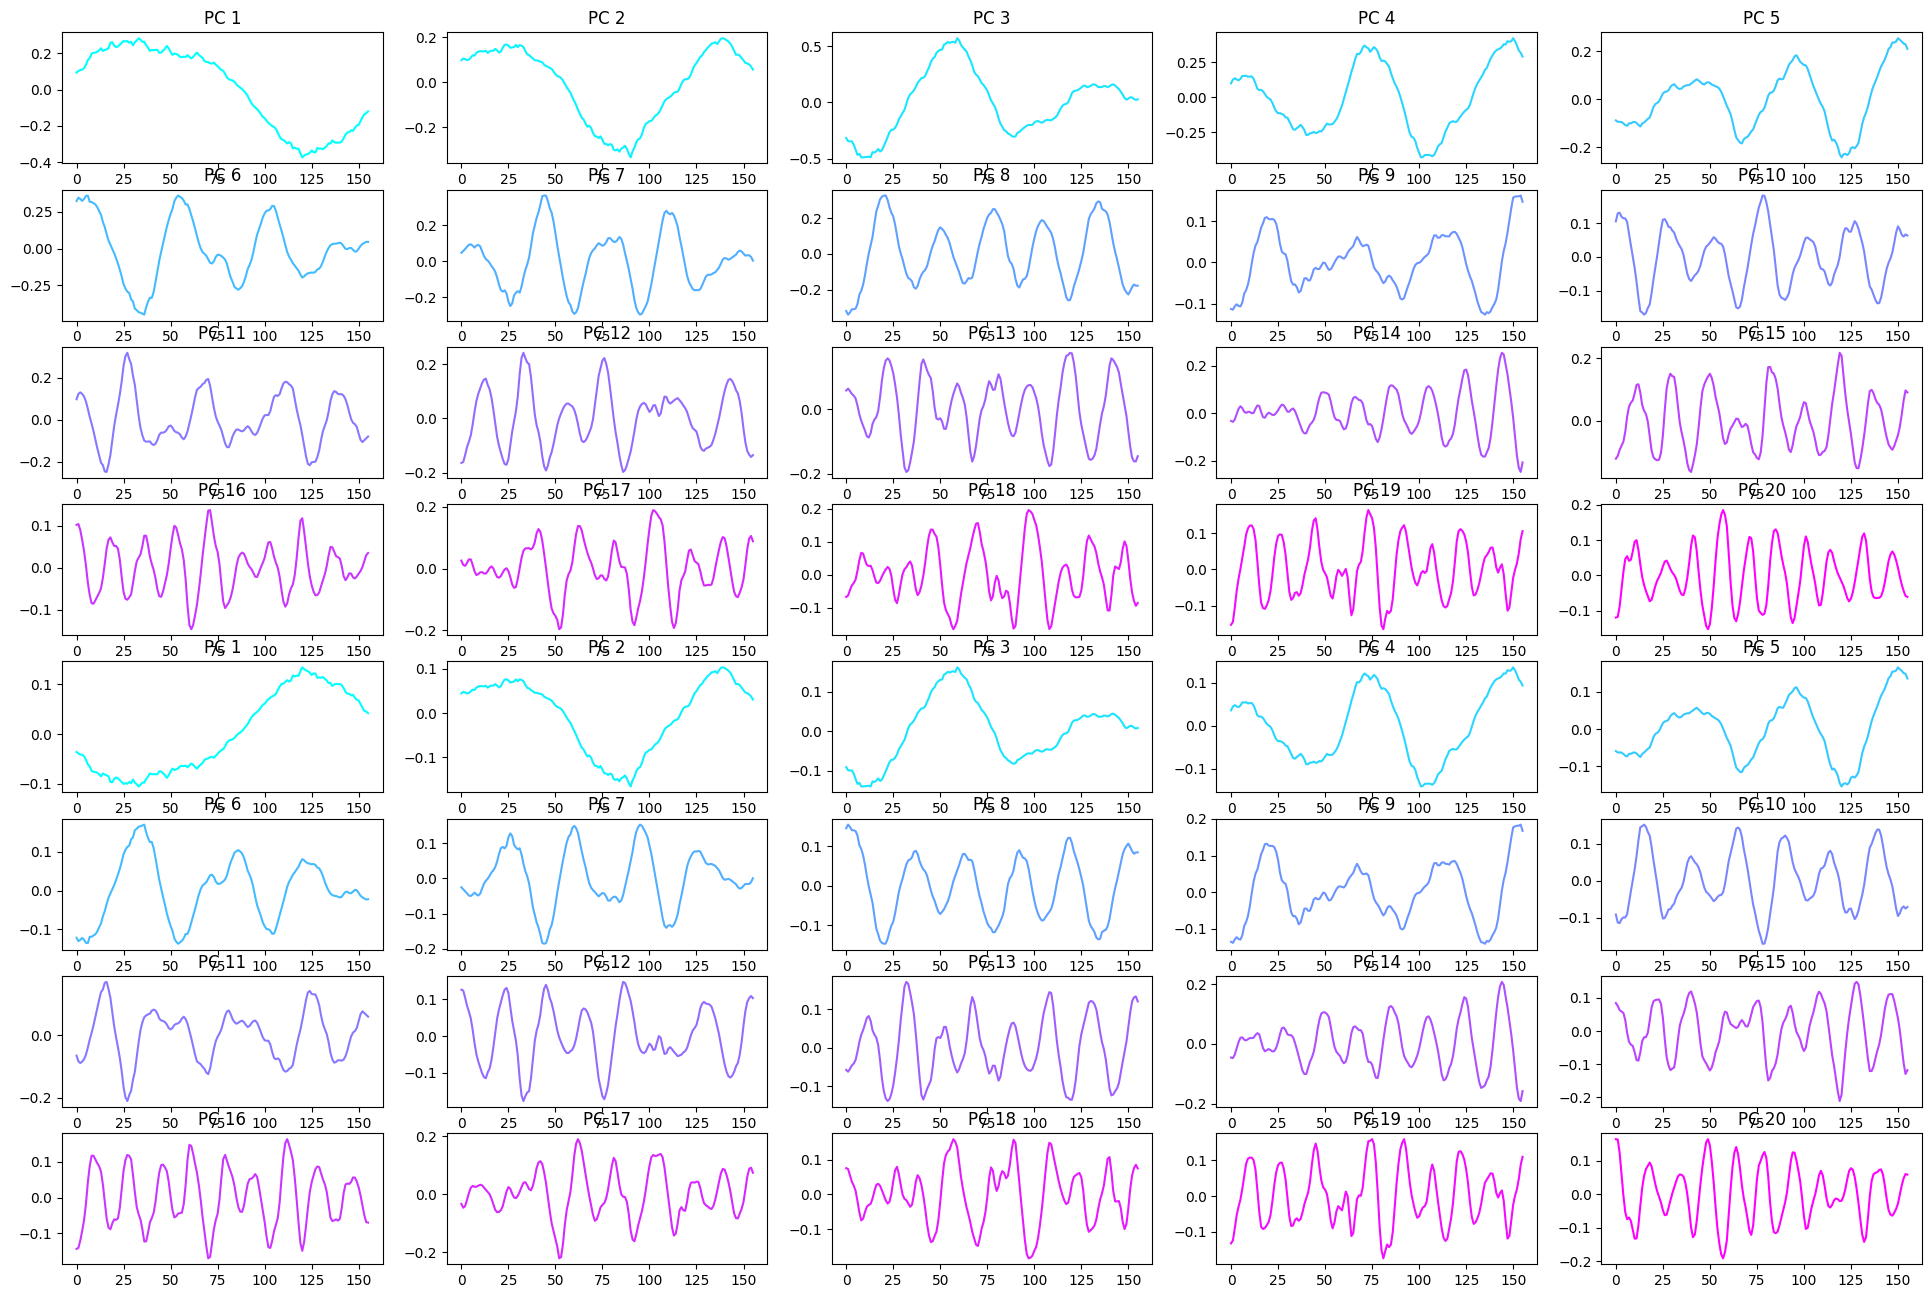

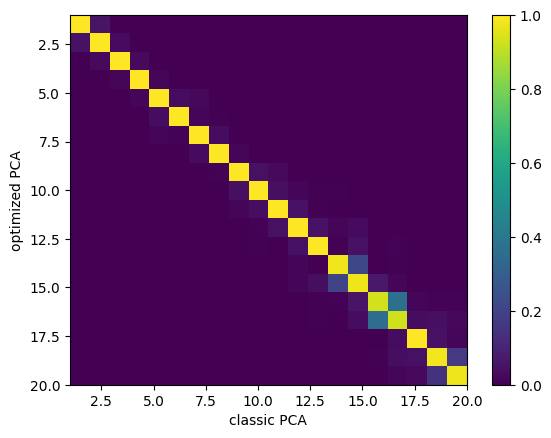

In [10]:
cool_colors = plt.cm.cool(np.linspace(0,1,ncomps))
plt.figure(figsize=(24,16), facecolor='w')
for i in range(ncomps):
    plt.subplot(8,5,i+1)
    plt.plot(C[i,:],color=cool_colors[i])
    plt.title('PC {}'.format((i+1)))
for i in range(ncomps):
    plt.subplot(8,5,ncomps+i+1)
    plt.plot(pca.components_[i,:],color=cool_colors[i])
    plt.title('PC {}'.format((i+1)))
    
corrmat=np.zeros((ncomps,ncomps))
for i in range(ncomps):
    for j in range(ncomps):
        res=pearsonr(pca.components_[i,:],C[j,:])
        corrmat[i,j]=np.abs(res[0])
plt.figure()
ax=plt.subplot(1,1,1)
i1=ax.imshow(corrmat, aspect='auto', origin='upper',
             extent=[1, pcs_to_analyze, pcs_to_analyze, 1], vmin=0, vmax=1)
i1.set_clim([0,1])
plt.colorbar(i1)
ax.set_xlabel('classic PCA')
ax.set_ylabel('optimized PCA')


In [11]:
[W,C]=altmin_pca.quadratically_regularized_pca(burst_std, ncomps, alpha=50)

PC1: iterations=29, error=256.46505700678307
PC2: iterations=28, error=242.84974742131382
PC3: iterations=34, error=231.38511493651197
PC4: iterations=18, error=222.98751209062362
PC5: iterations=45, error=217.88985118636845
PC6: iterations=19, error=212.8925770678115
PC7: iterations=24, error=210.71516385005438
PC8: iterations=8, error=210.65947927319056
PC9: iterations=48, error=210.06001848190166
PC10: iterations=40, error=210.00699810899428
PC11: iterations=35, error=209.95436406129238
PC12: iterations=7, error=209.9043389957171
PC13: iterations=33, error=209.8659716671281
PC14: iterations=14, error=209.81687978577068
PC15: iterations=24, error=209.7764624423691
PC16: iterations=7, error=209.74875297509033
PC17: iterations=7, error=209.71781214905675
PC18: iterations=25, error=209.68607710560383
PC19: iterations=33, error=209.64818427981666
PC20: iterations=30, error=209.61318231315576


Text(0, 0.5, 'optimized PCA')

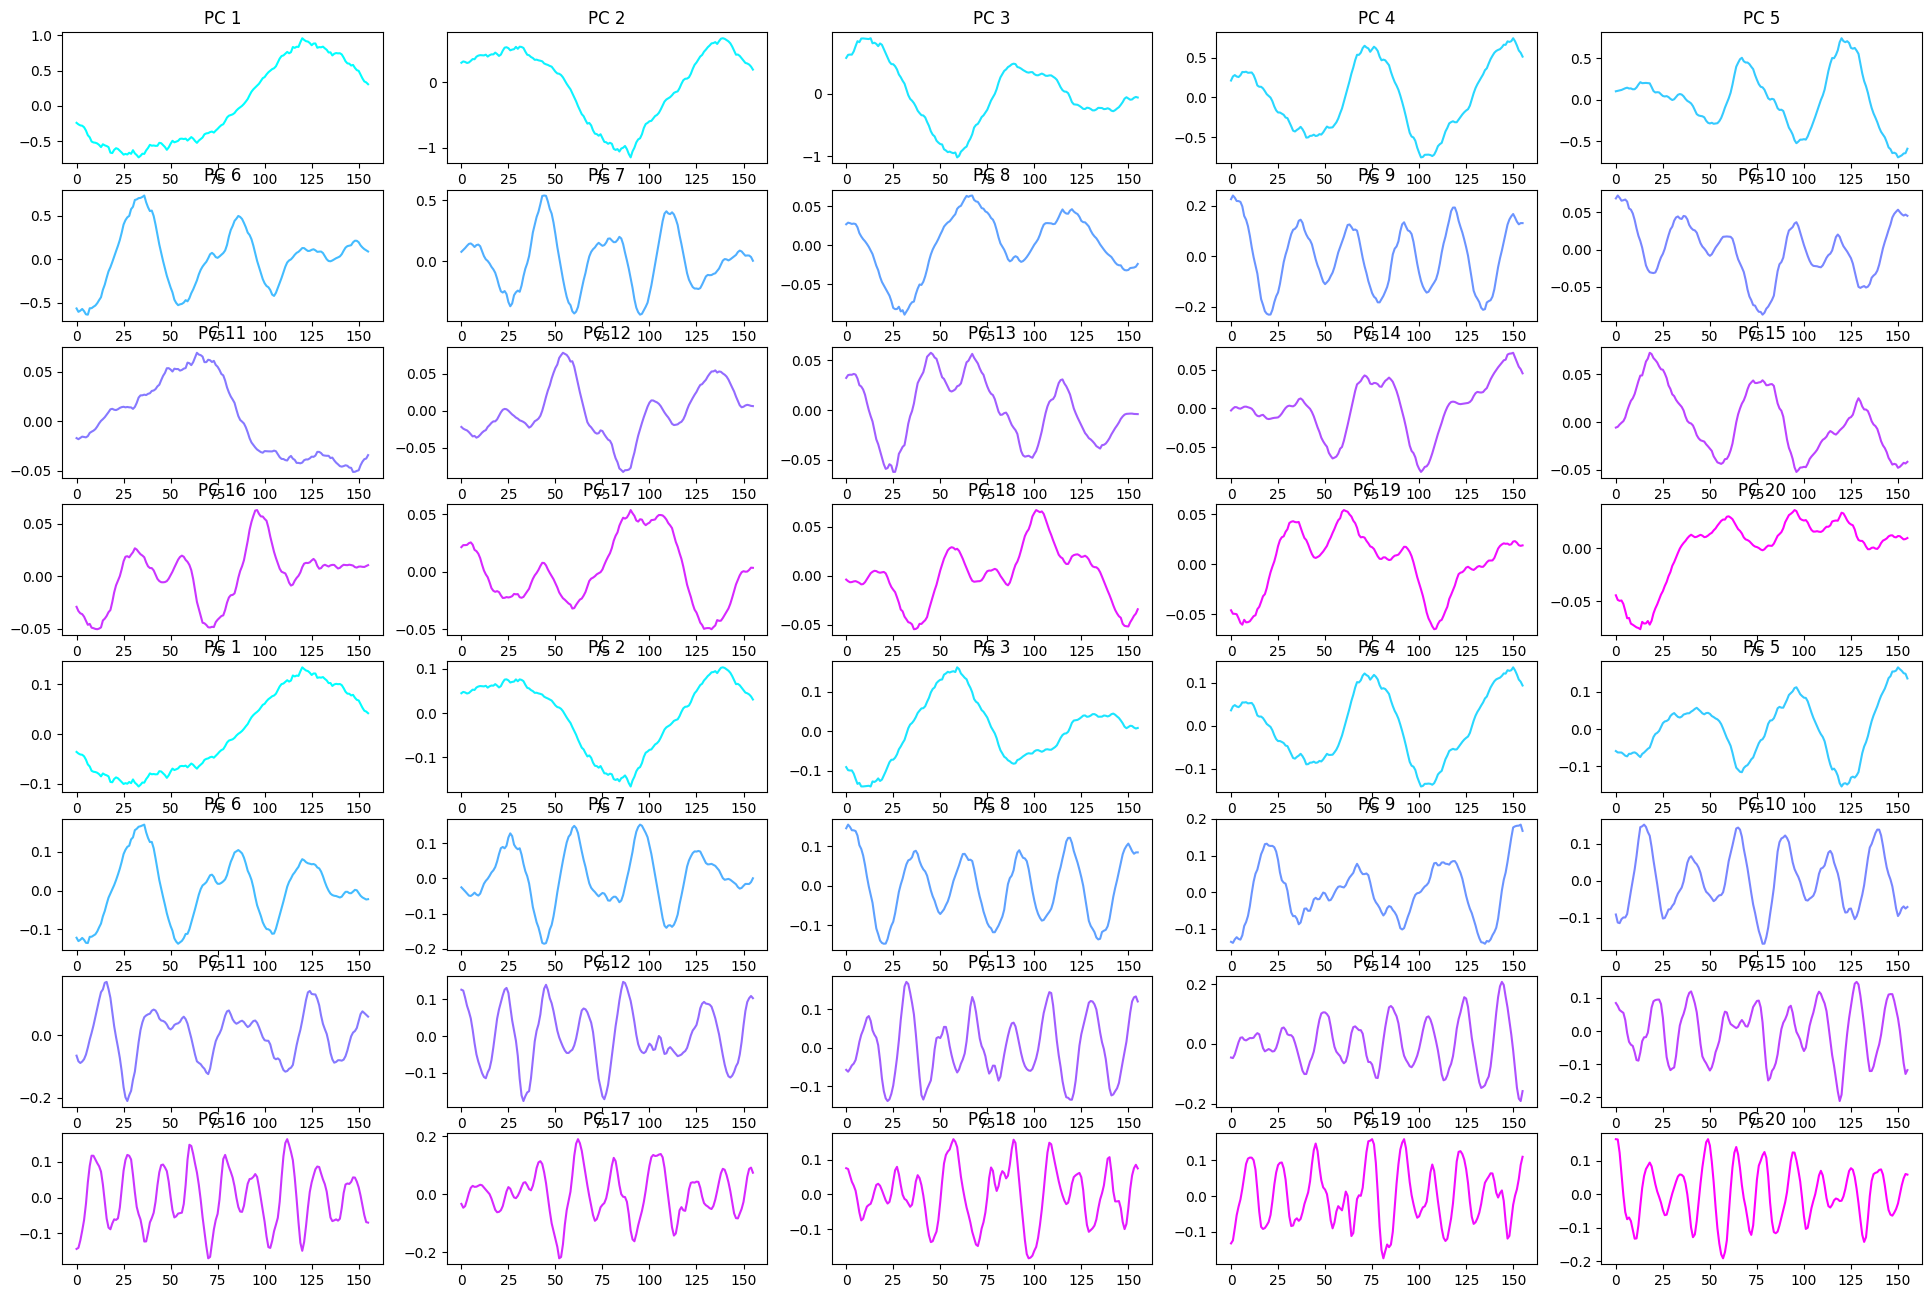

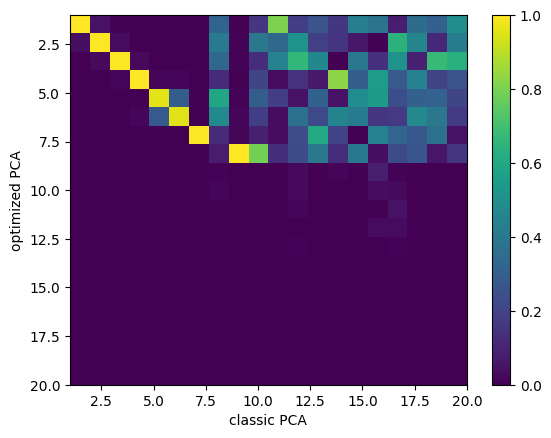

In [12]:
cool_colors = plt.cm.cool(np.linspace(0,1,ncomps))
plt.figure(figsize=(24,16), facecolor='w')
for i in range(ncomps):
    plt.subplot(8,5,i+1)
    plt.plot(C[i,:],color=cool_colors[i])
    plt.title('PC {}'.format((i+1)))
for i in range(ncomps):
    plt.subplot(8,5,ncomps+i+1)
    plt.plot(pca.components_[i,:],color=cool_colors[i])
    plt.title('PC {}'.format((i+1)))
    
corrmat=np.zeros((ncomps,ncomps))
for i in range(ncomps):
    for j in range(ncomps):
        res=pearsonr(pca.components_[i,:],C[j,:])
        corrmat[i,j]=np.abs(res[0])
plt.figure()
ax=plt.subplot(1,1,1)
i1=ax.imshow(corrmat, aspect='auto', origin='upper',
             extent=[1, pcs_to_analyze, pcs_to_analyze, 1], vmin=0, vmax=1)
i1.set_clim([0,1])
plt.colorbar(i1)
ax.set_xlabel('classic PCA')
ax.set_ylabel('optimized PCA')

In [13]:
[W,C]=altmin_pca.sparse_pca(burst_std, ncomps, alpha=20)

PC1: iterations=39, error=253.01287298882696
PC2: iterations=22, error=235.15549388295756
PC3: iterations=16, error=235.08125010868488
PC4: iterations=24, error=234.31059583184674
PC5: iterations=20, error=218.70913258954062
PC6: iterations=30, error=207.45589916022533
PC7: iterations=16, error=207.33483845049767
PC8: iterations=21, error=207.10266585137657
PC9: iterations=18, error=206.93901344545543
PC10: iterations=13, error=206.90273263879257
PC11: iterations=14, error=206.84612978983688
PC12: iterations=14, error=206.782649436335
PC13: iterations=19, error=206.6307271290528
PC14: iterations=15, error=206.53626348882173
PC15: iterations=26, error=195.12434628699302
PC16: iterations=14, error=195.08781900117796
PC17: iterations=12, error=195.0724267397663
PC18: iterations=13, error=195.03239897729426
PC19: iterations=13, error=194.99386091089758
PC20: iterations=15, error=194.94293548020875


Text(0, 0.5, 'optimized PCA')

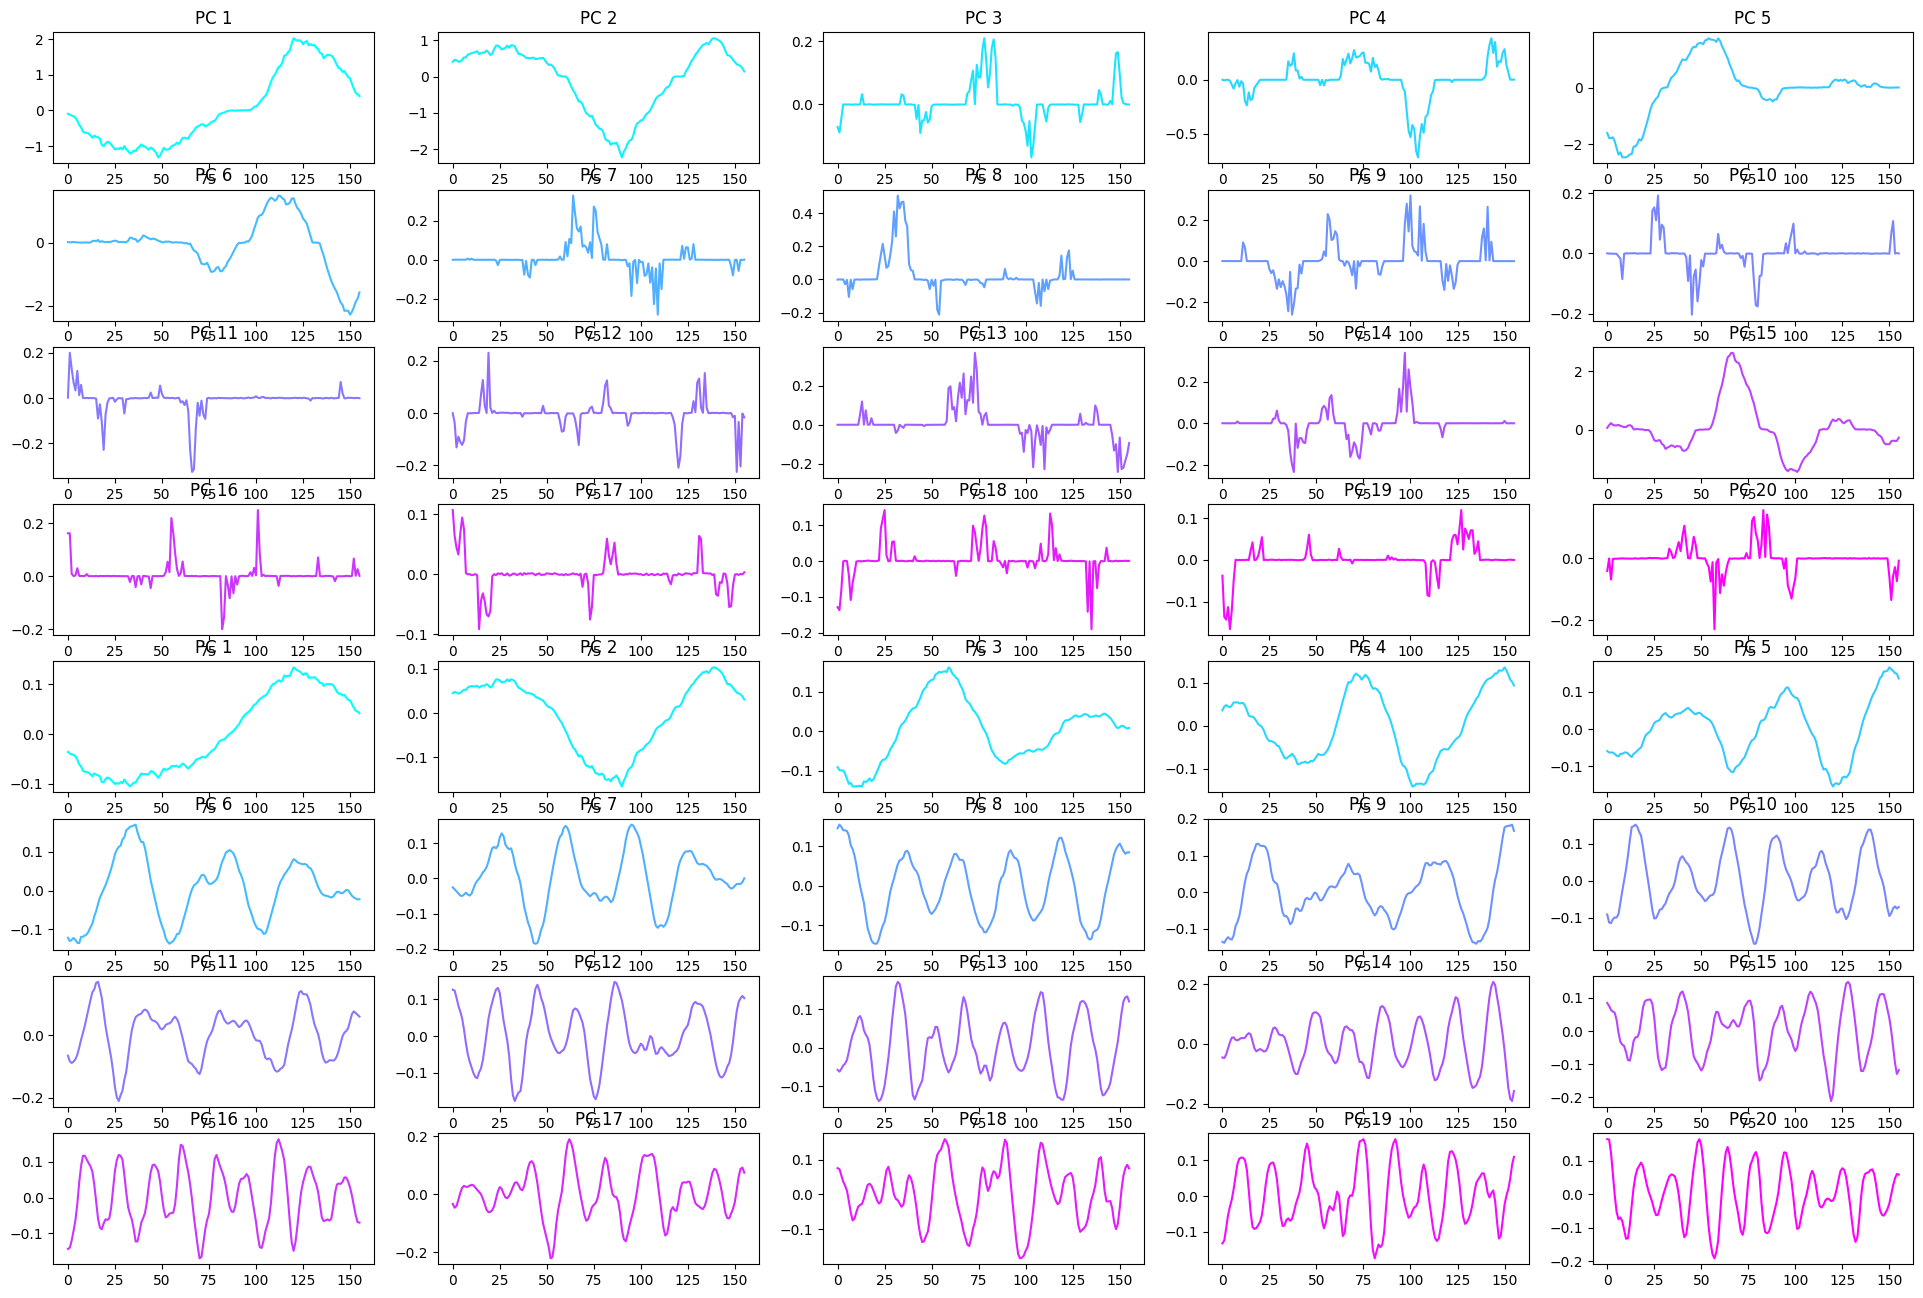

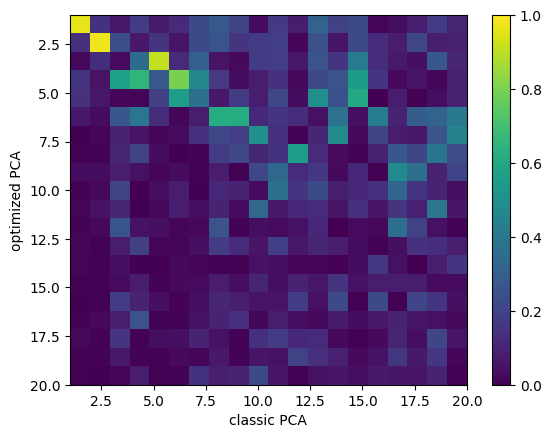

In [14]:
cool_colors = plt.cm.cool(np.linspace(0,1,ncomps))
plt.figure(figsize=(24,16), facecolor='w')
for i in range(ncomps):
    plt.subplot(8,5,i+1)
    plt.plot(C[i,:],color=cool_colors[i])
    plt.title('PC {}'.format((i+1)))
for i in range(ncomps):
    plt.subplot(8,5,ncomps+i+1)
    plt.plot(pca.components_[i,:],color=cool_colors[i])
    plt.title('PC {}'.format((i+1)))
    
corrmat=np.zeros((ncomps,ncomps))
for i in range(ncomps):
    for j in range(ncomps):
        res=pearsonr(pca.components_[i,:],C[j,:])
        corrmat[i,j]=np.abs(res[0])
plt.figure()
ax=plt.subplot(1,1,1)
i1=ax.imshow(corrmat, aspect='auto', origin='upper',
             extent=[1, pcs_to_analyze, pcs_to_analyze, 1], vmin=0, vmax=1)
i1.set_clim([0,1])
plt.colorbar(i1)
ax.set_xlabel('classic PCA')
ax.set_ylabel('optimized PCA')